# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [22]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [23]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [24]:
df.shape

(1898, 9)

#### Observations:
The data has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [25]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 103.9+ KB


#### Observations: 
All the columns have 1898 observations.
* The data contains numerical variables as intergers and floats like order id ,customer id,cost of the order,food preparation and delivery time .
* Some of the data are string variables like cuisine type ,restaurant name , day of the week and rating.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [26]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
No missing values ,all the columns contains 1898 non null variables.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [27]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


* The cost of the ordes has a wide range indicating that data consists of entries for different plates price.

In [28]:
df.describe().food_preparation_time

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations: 
* About the food preparation time ; once an order is placed the minimum time it takes for food is 20 mins and the maximum time is 35 mins and the average time is 27 mins and 3 secs


### **Question 5:** How many orders are not rated? [1 mark]

In [29]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: 
* The orders Not rated are 736 orders; people don't usually rate their experience.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [30]:
df.head(3)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28


### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Exporling the Data

In [31]:
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
399373     1
77511      1
62912      1
102010     1
385023     1
Name: customer_id, Length: 1200, dtype: int64

In [32]:
df['order_id'].unique()

array([1477147, 1477685, 1477070, ..., 1477819, 1477513, 1478056],
      dtype=int64)

In [33]:
df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

In [34]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Market Table                   1
Alidoro                        1
Lucky Strike                   1
Rye House                      1
Haru Gramercy Park             1
Name: restaurant_name, Length: 178, dtype: int64

In [35]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

### Data distributions

#### Cuisine Type

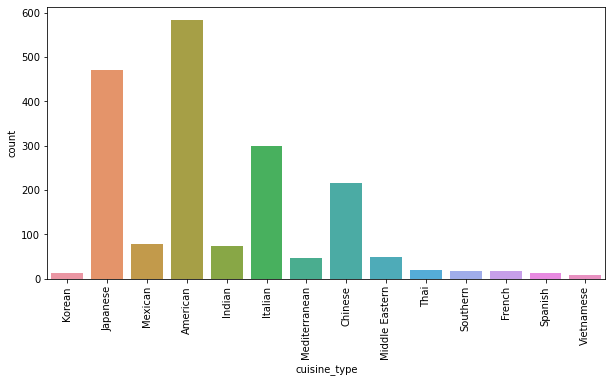

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data=df , x='cuisine_type')
plt.xticks(rotation=90);

#### Observations:
* The american cuisine is the most popular then the japanese, italian and chinese cuisine.  
* More than 500 orders are placed at American cuisine, and less than 50 orders are placed at the korean and Vitnamese cuisine.

#### Day of the week

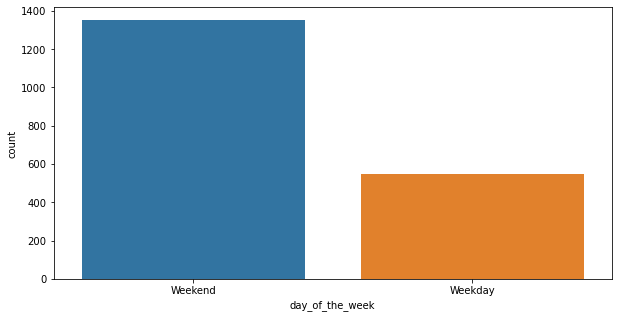

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data=df , x='day_of_the_week');

#### Observations:
* People used to make more orders during the weekends.
* A huge difference between days of the week while placing orders.

#### Rating

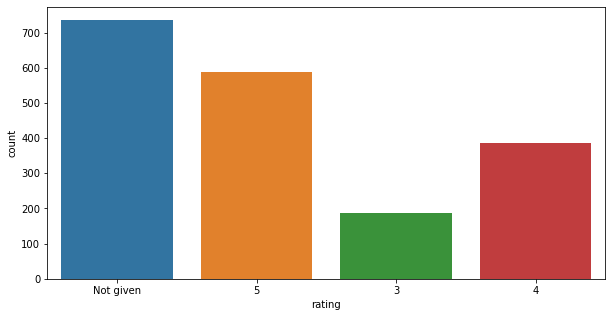

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data=df , x='rating');

##### Observations: 
* Unfortunatley people don't rate their experinece; as more than 700 orders are not rated.
* More the 500 orders was rated 5.
* And 400 orders was rated 4.
* 200 orders was rated 3.

#### Cost of the order

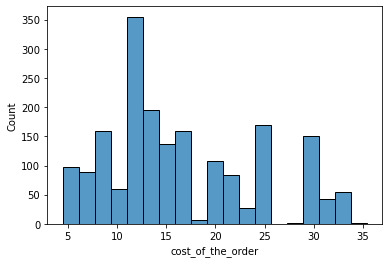

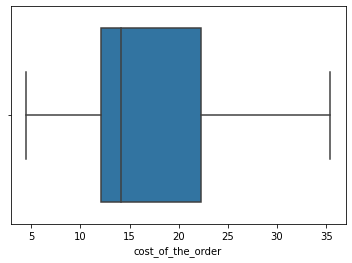

In [39]:
sns.histplot(data=df , x='cost_of_the_order')
plt.show()
sns.boxplot(data=df ,x='cost_of_the_order')
plt.show();

#### Observations:
* The distribution of the cost of orders says that their are a variatey of prices.
* Some of the orders cost between 10 to 15 dollars. 
* And few are 25 and 30 dollars.
* There are no outliers for cost of the orders.

#### Food preparation time 

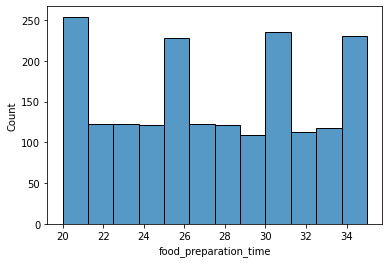

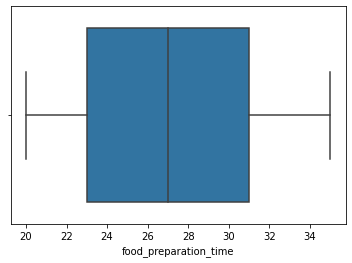

In [40]:
sns.histplot(data=df , x='food_preparation_time')
plt.show()
sns.boxplot(data=df ,x='food_preparation_time')
plt.show();

#### Observations:
* There are no outliers for food preparation time.
* 50% of the orders are prepared in 27 mins and in a max time 35 mins.

#### Delivery Time

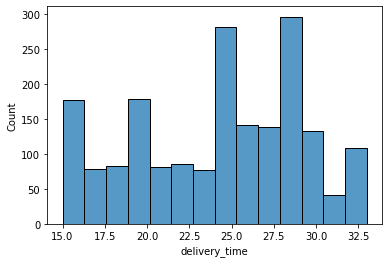

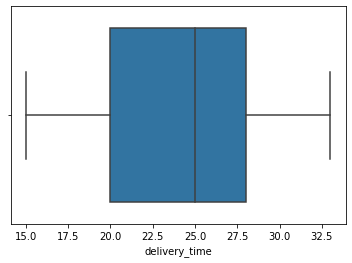

In [41]:
sns.histplot(data=df , x='delivery_time')
plt.show()
sns.boxplot(data=df ,x='delivery_time')
plt.show();

#### Observations: 
* There are no outliers for delivery time.
* 50 % of the orders are delivered in 25 mins.
* And max time delivered in 32 mins and 5 secs.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [42]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Market Table                   1
Alidoro                        1
Lucky Strike                   1
Rye House                      1
Haru Gramercy Park             1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
The top 5 restaurants receiving orders are :
* Shake shack 
* The meatball Shop 
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken
* Parm  

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [43]:
df1 = df[df['day_of_the_week'] =='Weekend']

In [44]:
df1['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Middle Eastern     32
Mediterranean      32
Thai               15
French             13
Spanish            11
Southern           11
Korean             11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
* The most popular cuisine in the weekends is the Amercian cuisine.
* The japanese cuisine also is a favorite type of food in New York during weekend. 

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [45]:
df2= df[df['cost_of_the_order']> 20]

In [46]:
(df2.shape[0]/df.shape[0])*100

29.24130663856691

#### Observations:
* Around 29% of the orders are more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [47]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
* The average delivery time is 24 mins and 16 secs.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [48]:
df.customer_id.value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The top 3 frequent customers are :
* cust'ID is 52832 placed 13 orders 
* cust'ID is 47440 placed 10 orders
* cust'ID is 83287 placed 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Starting with the Heatmap to find the different corrolation between numerical variables

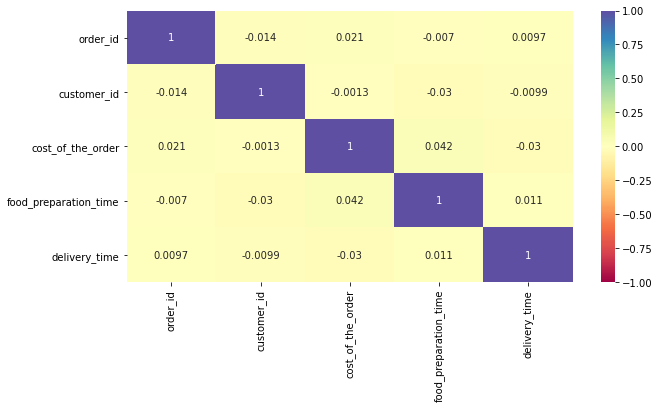

In [49]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);

### Cuisine type and cost of the order

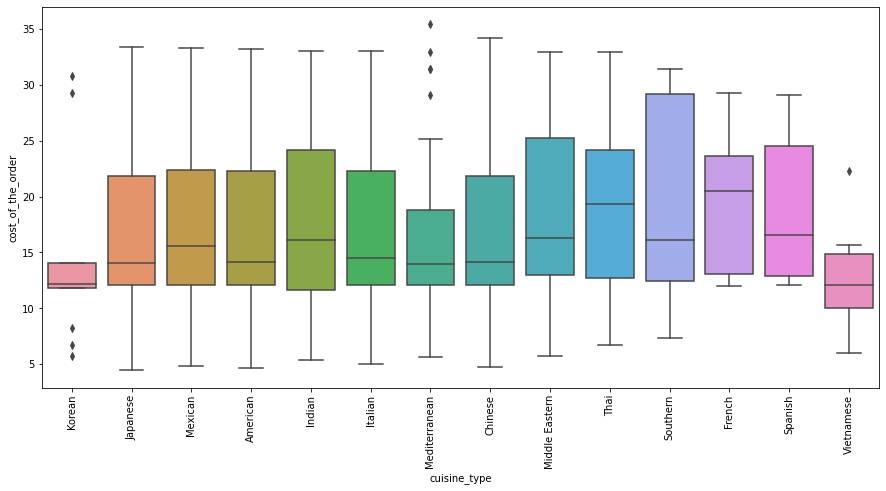

In [50]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show();

### Delivery time and the day of the week 

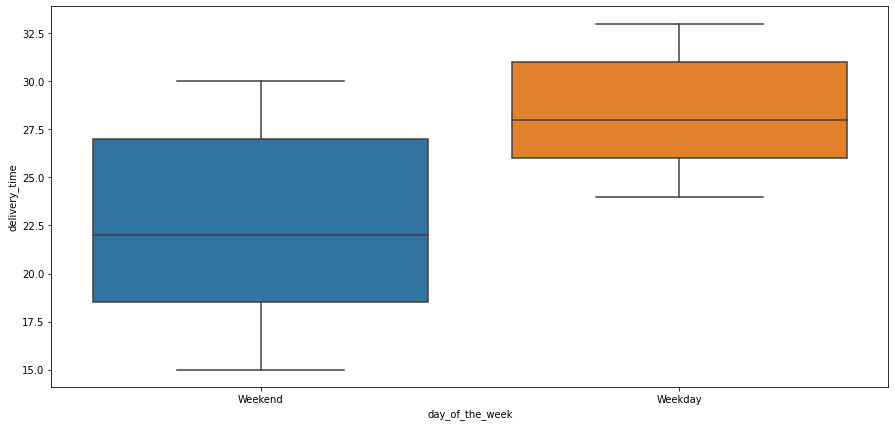

In [51]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show();

### Cuisine and Food Preparation time

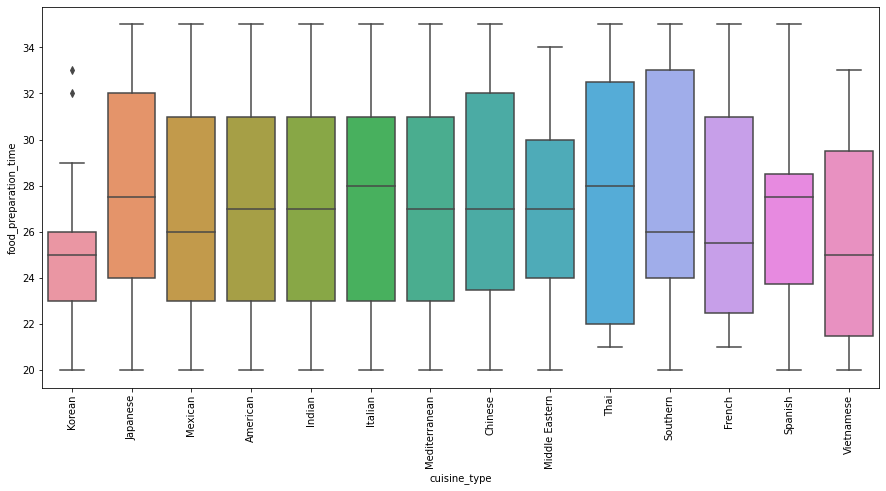

In [52]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time')
plt.xticks(rotation=90)
plt.show();

### Rating and Delivery time

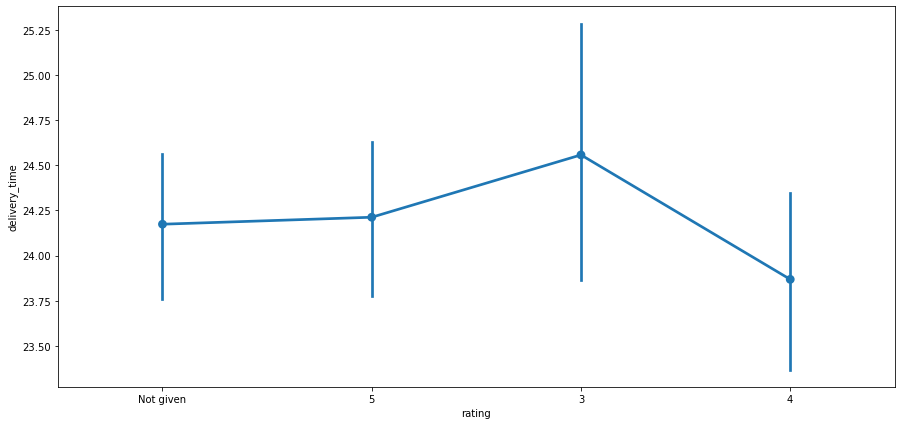

In [53]:
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x = 'rating', y = 'delivery_time')
plt.show();

### Rating and Food preparation time

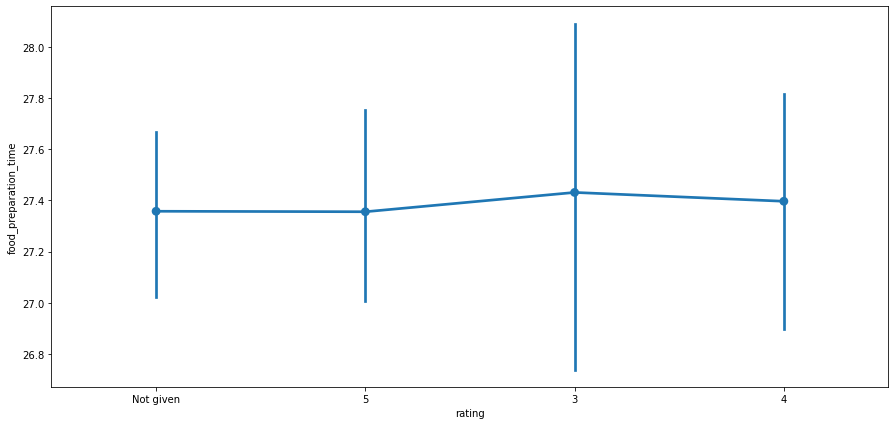

In [54]:
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x = 'rating', y = 'food_preparation_time')
plt.show();

### Rating and Cost of the order

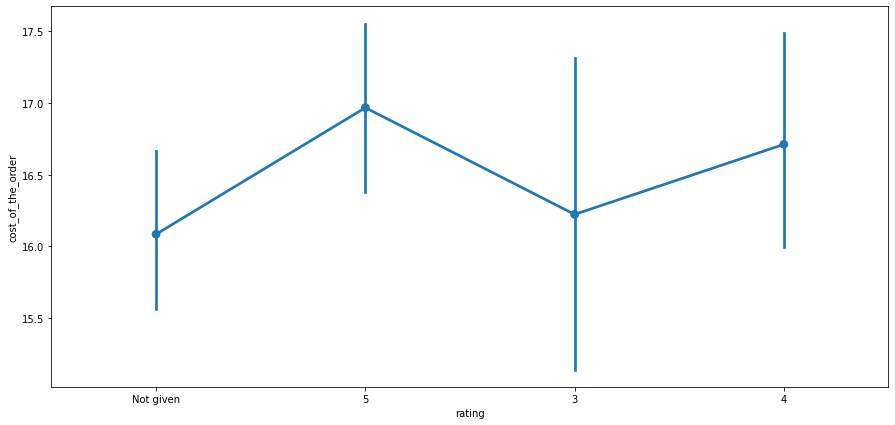

In [55]:
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x = 'rating', y = 'cost_of_the_order')
plt.show();

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [56]:
df_copy= df.copy()

In [57]:
df_copy['rating'] = df_copy['rating'].replace(['Not given'],np.nan)

In [58]:
df_copy['rating'] = df_copy['rating'].astype(float)

In [59]:
rating_count=df_copy.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

In [60]:
rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [61]:
rest_50= rating_count[rating_count['rating'] > 50]['restaurant_name']

In [62]:
rest_50

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [63]:
mean_4 = df_copy[df_copy['restaurant_name'].isin(rest_50)].dropna()

In [64]:
mean_4

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5.0,23,17
15,1477414,66222,Shake Shack,American,16.20,Weekend,5.0,33,25
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4.0,35,26
22,1478287,150599,Shake Shack,American,29.10,Weekday,5.0,21,30
...,...,...,...,...,...,...,...,...,...
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5.0,35,27
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3.0,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4.0,27,29
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5.0,34,25


In [65]:
mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:


The restaurants which fullfilled the criteria to get the promotion are :
* The meatball Shop 
* Blue Ribbon Fried Chicken
* Shake Shack 
* Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [66]:
tot_net_revenue= 0
for i in df['cost_of_the_order']:
    if i > 20:
        net_revenue = i*(25/100)
        tot_net_revenue= tot_net_revenue + net_revenue
        
    elif i > 5:
        net_revenue = i*(15/100)
        tot_net_revenue= tot_net_revenue + net_revenue
    else:
        net_revenue = i*0
        tot_net_revenue= tot_net_revenue + net_revenue
        
    
print('The net revenue across all orders is: ', tot_net_revenue)

The net revenue across all orders is:  6166.302999999994


#### Observations:
* The net revenue generated across all orders is $6166 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [67]:
df['total_time']= df['food_preparation_time']+df['delivery_time']

In [68]:
df.head(1)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45


In [69]:
df4 = df[df['total_time'] > 60]

In [70]:
df4.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,total_time
count,2.000000e+02,200.000000,200.000000,200.00000,200.000000,200.00000
mean,1.477510e+06,167372.450000,16.327550,33.16000,29.900000,63.06000
std,5.293019e+02,109201.008479,7.684291,1.78052,1.994969,1.90909
min,1.476565e+06,5693.000000,4.750000,28.00000,26.000000,61.00000
25%,1.477057e+06,83932.500000,9.552500,32.00000,28.000000,61.00000
50%,1.477477e+06,129164.000000,14.890000,34.00000,30.000000,63.00000
75%,1.477903e+06,259848.500000,22.272500,35.00000,32.000000,64.00000
max,1.478433e+06,403019.000000,33.030000,35.00000,33.000000,68.00000


In [71]:
(df4.shape[0]/df.shape[0])*100

10.537407797681771

#### Observations:
* Around 10% of the orders took 60 mins to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [72]:
del_mean=df.groupby(['day_of_the_week'])[['delivery_time']].mean()

In [73]:
del_mean

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
* we observed that the delivery time differs by 6 mins between weekdays and weekends.
* The average time in weekdays 28 mins 
* And in weekend is 22 mins.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The amercian cuisine is the most popular
*  The japanese, italian and chinese cuisine aslo has a huge number of orders.
*  People used to make more orders  during the weekends.
*  Unfortunatley people don't rate their experinece ,but more than 500 orders was rated 5 and 400 orders was rated 4.
*  The distribution of the cost of orders says that their are a variatey of prices , some orders cost between 10 to 15 dollars and few are 25 and 30 dollars.
*  Food preparation time: 50% of the orders took 27 mins and max time is 35 mins.
*  Around 50 % of the orders are delivered in 25 mins , and max in 32 mins and 5 secs.
*  The top 5 restaurants receiving orders are : 1- Shake shack 
                                             2- The meatball Shop 
                                             3- Blue Ribbon Sushi
                                             4- Blue Ribbon Fried Chicken
                                             5- Parm  
*  The most popular cuisine during the weekends is the Amercian cuisine.
*  Around 29% of the orders are more than 20 dollars.
*  The average delivery time is 24 mins and 16 secs.

### Recommendations:

*  The foodhub company should focus on how to encourage customers to rate their experience every time they order from a restaurant, it is a very effective way to get a fair idea about the business feedback , and to enhance the weak points.
*  The food aggregator should do extra attractive offers during weekdays , to increase the orders rate.
*  Advising the restaurant to minimise the food preparation time , as this affect the total time of placing orders and at the end affect the customer experience.
*  Increasing the number of employees for delivery , to decrease the delivery time that affect the customer experience.
*  Delivery cab availability must be ensured during Weekend , as it's the peak time for ordering delivery.
*  Adding some discounts on the company charges percentage for the restaurant who recieved more orders.
*  Foodhub company should focus on the type of cuisine that is popular in New York like: American,japanese, italian and chinese they can do more deals with more restaurants of these type of cuisine. 
* More data should be procured on orders rate and customer feedback so a model can be built that can predict optimal delivery experience through the foodhub company.

---